In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()


In [4]:

# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mapping to 'animal' (1) and 'vehicle' (0)
an_classes = [2, 3, 4, 5, 6, 7]  # bird, cat, deer, dog, frog, horse
vehicle_classes = [0, 1, 8, 9]  # airplane, automobile, ship, truck
# np.isin(y_train_full, vehicle_classes) → returns True/False array where:

# True if label is in vehicle_classes (0, 1, 8, 9)

# False otherwise (i.e., it's an animal)

# np.where(..., 0, 1) → converts:

# True → 0 (vehicle)

# False → 1 (animal)

# .flatten() → reshapes label array to 1D vector.
y_train = np.where(np.isin(y_train_full, vehicle_classes), 0, 1).flatten()
y_test = np.where(np.isin(y_test_full, vehicle_classes), 0, 1).flatten()
# For CIFAR-10 after flattening:

# You get a table with 10000 rows (images) and 3072 columns (features per image).
# After flattening: becomes a 1D array of length 3072 → [p1, p2, p3, ..., p3072].
# Flatten images for Logistic Regression and KNN
# Scales pixel values from [0, 255] to [0, 1].
# Pixel intensity values in images range from 0 to 255 (uint8). ML algorithms perform better if data is on a smaller scale.


X_train_flat = X_train_full.reshape(X_train_full.shape[0], -1) / 255.0
X_test_flat = X_test_full.reshape(X_test_full.shape[0], -1) / 255.0

# Standardize to ensure the model treats all features equally in importance & scale.

# Standardization helps with:

# Faster convergence (for gradient-based optimizers).

# Distance-based models (like KNN) to avoid dominance of features with higher variance.
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print(f"X_train shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (50000, 3072)
y_train shape: (50000,)


In [5]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


c:\Users\intel\Desktop\UniCourses\ai cep\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\intel\Desktop\UniCourses\ai cep\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python312\Lib\subprocess.py", line 1538, in _exec

KNN Accuracy: 0.8104
              precision    recall  f1-score   support

           0       0.83      0.66      0.74      4000
           1       0.80      0.91      0.85      6000

    accuracy                           0.81     10000
   macro avg       0.82      0.79      0.79     10000
weighted avg       0.81      0.81      0.81     10000



#
LOgistic Regresion Model1


In [6]:
# Train Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.807
              precision    recall  f1-score   support

           0       0.73      0.83      0.77      4000
           1       0.87      0.79      0.83      6000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.82      0.81      0.81     10000



c:\Users\intel\Desktop\UniCourses\ai cep\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


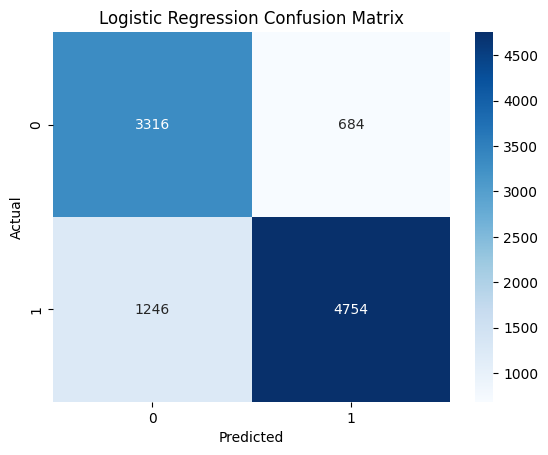

In [7]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


LR M2

In [8]:

from sklearn.linear_model import LogisticRegression
log_reg2 = LogisticRegression(max_iter=100)
log_reg2.fit(X_train_scaled, y_train)

# Predict
y_pred_log2 = log_reg2.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log2))
print(classification_report(y_test, y_pred_log2))

c:\Users\intel\Desktop\UniCourses\ai cep\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8188
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      4000
           1       0.83      0.87      0.85      6000

    accuracy                           0.82     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



c:\Users\intel\Desktop\UniCourses\ai cep\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression with Elastic Net Accuracy: 0.8217
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4000
           1       0.83      0.88      0.86      6000

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.82      0.82     10000



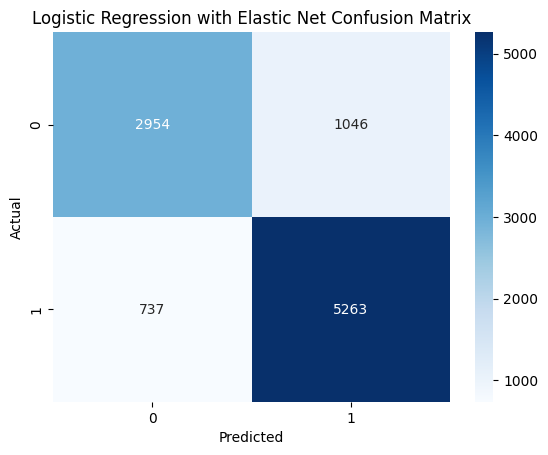

In [9]:
log_reg_elastic = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.5)
log_reg_elastic.fit(X_train_scaled, y_train)
# Predict   
y_pred_log_elastic = log_reg_elastic.predict(X_test_scaled)
# Evaluate      
print("Logistic Regression with Elastic Net Accuracy:", accuracy_score(y_test, y_pred_log_elastic))
print(classification_report(y_test, y_pred_log_elastic))
# Confusion Matrix for Logistic Regression with Elastic Net
cm_elastic = confusion_matrix(y_test, y_pred_log_elastic)
sns.heatmap(cm_elastic, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression with Elastic Net Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Example 1: KNN with small number of neighbors and uniform weights
knn_1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean', weights='uniform')
knn_1.fit(X_train_scaled, y_train)
y_pred_1 = knn_1.predict(X_test_scaled)
print("Accuracy (small k, uniform weights):", accuracy_score(y_test, y_pred_1))

# Example 2: KNN with large number of neighbors and distance weights
knn_2 = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')
knn_2.fit(X_train_scaled, y_train)
y_pred_2 = knn_2.predict(X_test_scaled)
print("Accuracy (large k, distance weights):", accuracy_score(y_test, y_pred_2))


In [ ]:
# # Split data into Train (70%), Validation (15%), Test (15%)
# X_train70, X_temp, y_train70, y_temp = train_test_split(X_train_full, y, test_size=0.3, random_state=42)
# X_val15, X_test15, y_val15, y_test15 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# To store results
results = []
from sklearn.model_selection import train_test_split

splits = [0.2, 0.3, 0.4]  # Different test sizes

for split in splits:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train_scaled, y_train, test_size=split, random_state=42)
    
    print(f"\nTrain-Test Split: {int((1-split)*100)}% Train / {int(split*100)}% Test")
    
    for n in knn_params['n_neighbors']:
        for w in knn_params['weights']:
            for m in knn_params['metric']:
                knn = KNeighborsClassifier(n_neighbors=n, weights=w, metric=m)
                knn.fit(X_train_split, y_train_split)
                y_pred = knn.predict(X_test_split)
                acc = accuracy_score(y_test_split, y_pred)
                print(f"KNN (n_neighbors={n}, weights='{w}', metric='{m}') → Accuracy: {acc:.4f}")      
                results.append({
                    'n_neighbors': n,
                    'weights': w,
                    'metric': m,
                    'accuracy': acc,
                    'train_size': int((1-split)*100),
                    'test_size': int(split*100)
                })
